### weight and height prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weight-height.csv")

In [3]:
df = df.head(150)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
145,Male,70.515860,183.759845
146,Male,71.338376,201.954495
147,Male,71.001945,216.120095
148,Male,66.202348,159.390324


In [4]:
df.drop(columns="Gender",inplace=True)

Text(0, 0.5, 'Height')

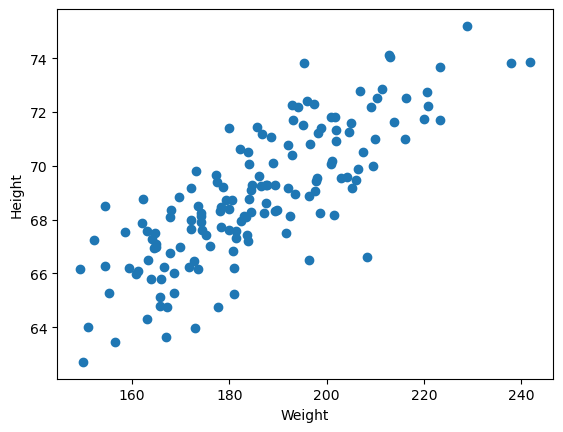

In [5]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:

y = df["Height"].values

X = df[["Weight"]].values

In [7]:
X

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       [220.0424703 ],
       [206.34980062],
       [152.21215576],
       [183.9278886 ],
       [167.97111049],
       [175.9294404 ],
       [156.39967639],
       [186.60492556],
       [213.74116949],
       [167.12746107],
       [189.44618139],
       [186.43416802],
       [172.18693006],
       [196.02850633],
       [172.88347021],
       [185.98395757],
       [182.42664801],
       [174.11592908],
       [197.73142161],
       [149.17356601],
       [228.76178062],
       [162.00665185],
       [192.34397658],
       [184.43517441],
       [206.82818942],
       [175.2139224 ],
       [154.34263893],
       [187.50684316],
       [212.91022533],
       [195.03224323],
       [205.18362134],
       [204.16412548],
       [192.90351507],
       [197.4882426 ],
       [183.81097323],
       [163.85182488],
       [163.10801715],
       [172.13559741],
       [194.0454049 ],
       [168.6177462 ],
       [161

In [8]:
y

array([73.84701702, 68.78190405, 74.11010539, 71.7309784 , 69.88179586,
       67.25301569, 68.78508125, 68.34851551, 67.01894966, 63.45649398,
       71.19538228, 71.64080512, 64.76632913, 69.2830701 , 69.24373223,
       67.6456197 , 72.41831663, 63.97432572, 69.6400599 , 67.93600485,
       67.91505019, 69.43943987, 66.14913196, 75.20597361, 67.89319634,
       68.1440328 , 69.08963143, 72.80084352, 67.42124228, 68.49641536,
       68.61811055, 74.03380762, 71.52821604, 69.1801611 , 69.57720237,
       70.40092889, 69.07617117, 67.19352328, 65.80731565, 64.30418789,
       67.97433623, 72.18942596, 65.27034552, 66.09017738, 67.51032152,
       70.10478626, 68.25183644, 72.17270912, 69.17985762, 72.87036015,
       64.78258298, 70.18354989, 68.49145025, 67.33083088, 66.99094408,
       66.4995499 , 68.35305665, 70.77445907, 71.21592367, 70.01336535,
       71.40318222, 69.55200509, 73.81853456, 66.99688275, 71.41846589,
       65.27930021, 68.27419147, 72.76536995, 68.0993798 , 68.89

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 1), (30, 1), (120,), (30,))

In [12]:
# scaled the data
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
model building

SyntaxError: invalid syntax (2430493455.py, line 1)

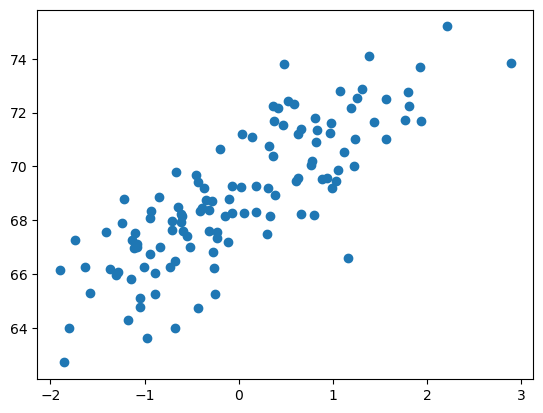

In [15]:
plt.scatter(x_train_scaled,y_train)

In [16]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [17]:
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [18]:
print("coefficient or slope of data : ",regression.coef_)
print("intercept of data is : ",regression.intercept_)

coefficient or slope of data :  [2.06746235]
intercept of data is :  68.88556047839023


formula is intercept + coeficient*datapoint

In [19]:
y_pred = regression.predict(x_test_scaled)

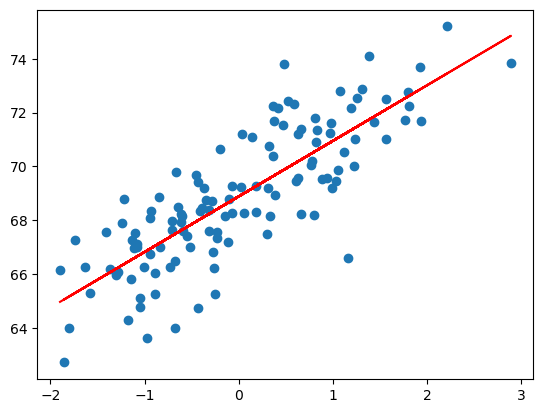

In [20]:
plt.scatter(x_train_scaled,y_train)
plt.plot(x_train_scaled,regression.predict(x_train_scaled),color="red")

In [21]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mae",mean_squared_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("r2_score",r2_score(y_test,y_pred))

mae 2.512031670265405
mse 2.512031670265405
r2_score 0.5420876218688057


Text(0, 0.5, 'Height')

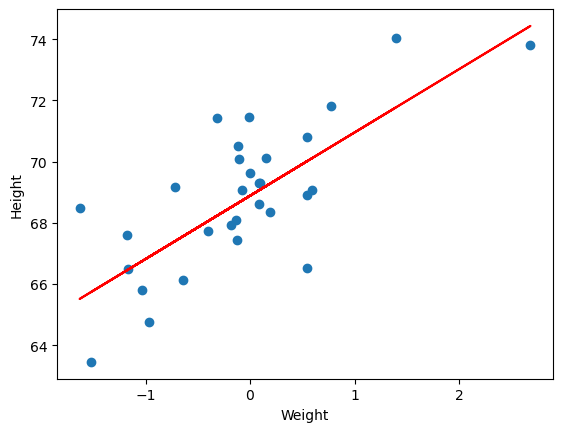

In [22]:
plt.scatter(x_test_scaled,y_test)
plt.plot(x_test_scaled,regression.predict(x_test_scaled),color="red")
plt.xlabel("Weight")
plt.ylabel("Height")

In [32]:
# sorking on new data
weight = 280
weight = np.array(weight,ndmin=2)
scaled_weight = scaler.transform(weight)

In [33]:
regression.predict(scaled_weight)[0]

78.92697472264466

/tmp/ipykernel_14936/2594475886.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(recidual)


<Axes: ylabel='Density'>

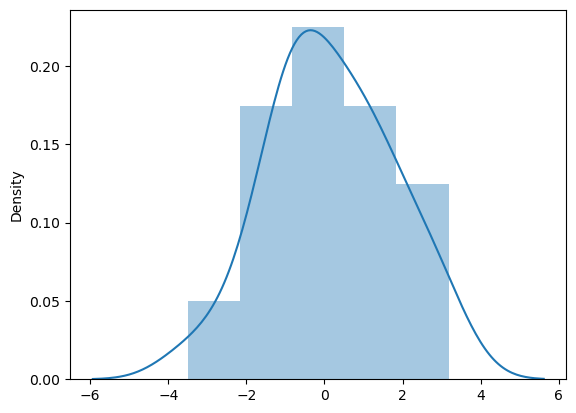

In [35]:
recidual = y_test-y_pred
sns.distplot(recidual)

<Axes: ylabel='Count'>

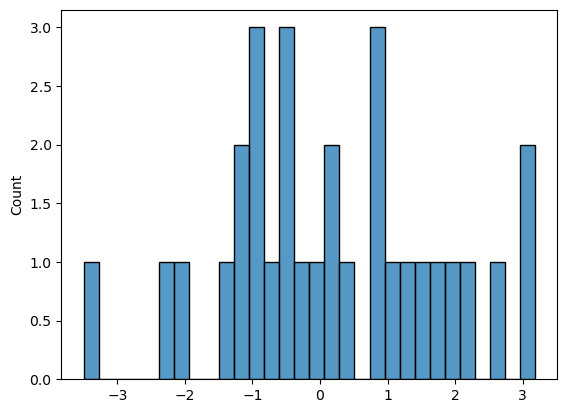

In [39]:
sns.histplot(recidual,bins=30)

In [40]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
print("mae",mean_absolute_error(y_test,y_pred2))
print("mae",mean_squared_error(y_test,y_pred2))
print("mae",r2_score(y_test,y_pred2))

mae 1.2928139815058388
mae 2.5120316702654053
mae 0.5420876218688055


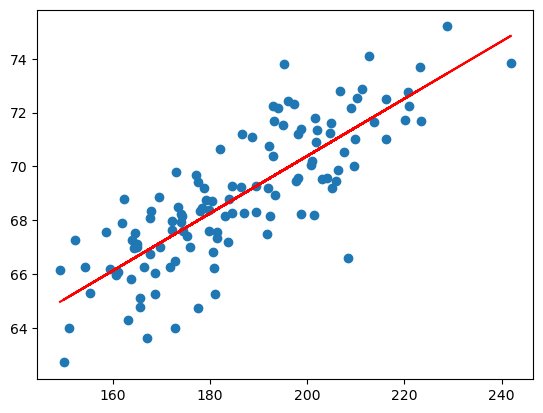

In [43]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color="r")

/tmp/ipykernel_14936/819411283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reciduals)


<Axes: ylabel='Density'>

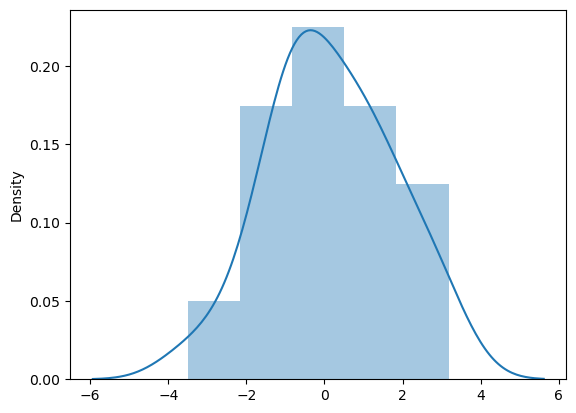

In [44]:
reciduals = y_test-y_pred2
sns.distplot(reciduals)